In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../Wine/winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df['fixed acidity'].describe()

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

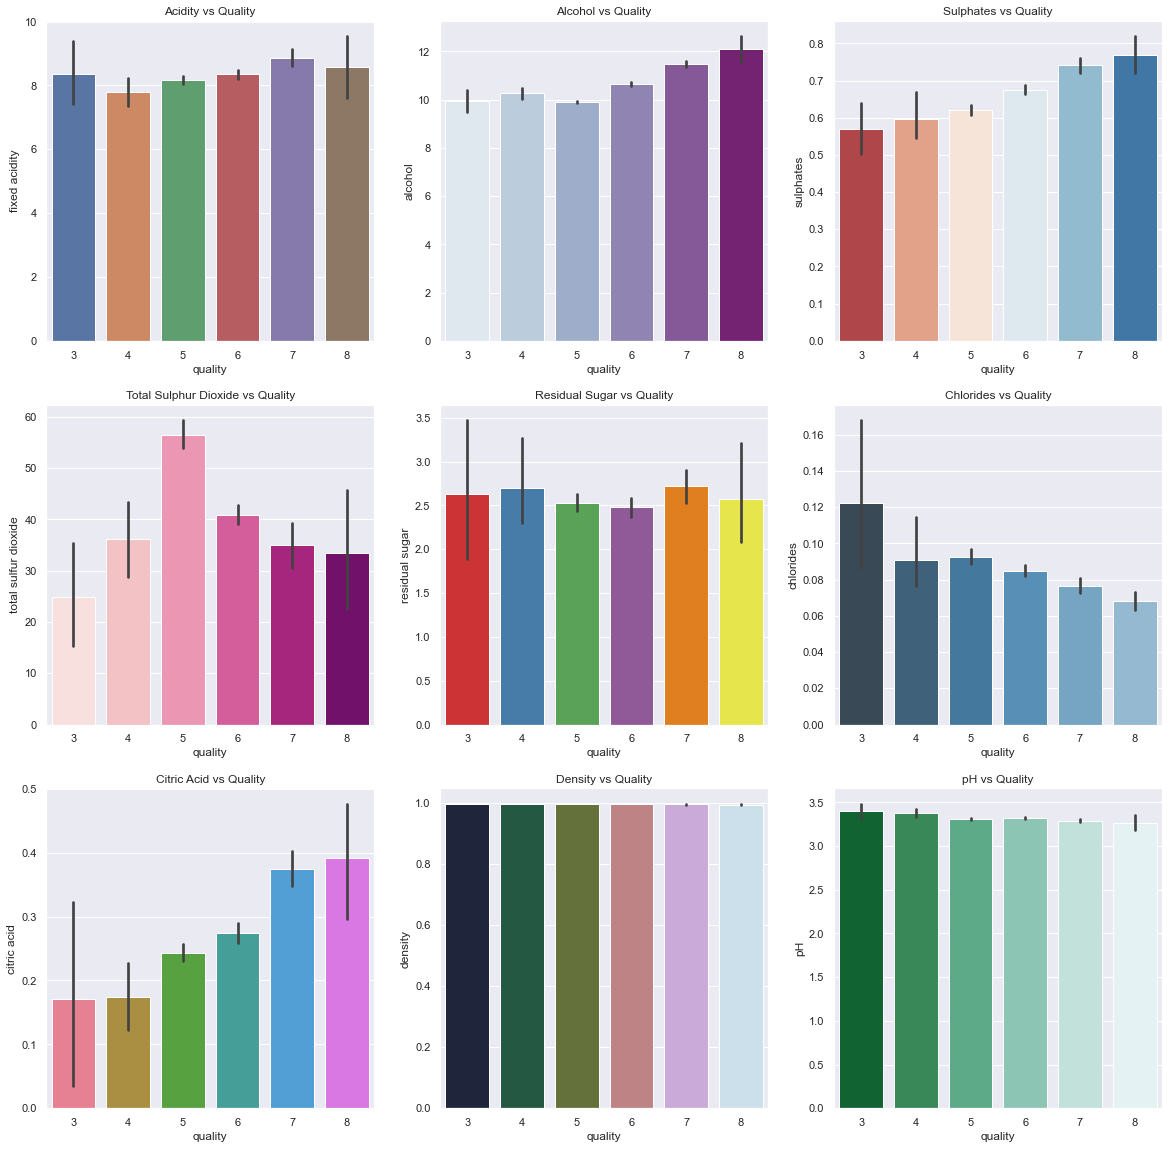

In [6]:
fig, ax = plt.subplots(figsize = (20, 20), nrows = 3, ncols = 3)

ax[0][0].set_title("Acidity vs Quality")
chart = sns.barplot(x = df['quality'], y =  df['fixed acidity'], ax = ax[0][0])

ax[0][1].set_title("Alcohol vs Quality")
sns.barplot(x = df['quality'], y = df['alcohol'], palette = "BuPu", ax = ax[0][1])

ax[0][2].set_title("Sulphates vs Quality")
sns.barplot(data = df, x = 'quality', y = 'sulphates', palette="RdBu", ax = ax[0][2])

ax[1][0].set_title("Total Sulphur Dioxide vs Quality")
chart = sns.barplot(x = df['quality'], y =  df['total sulfur dioxide'], ax = ax[1][0], palette='RdPu')

ax[1][1].set_title("Residual Sugar vs Quality")
sns.barplot(x = df['quality'], y = df['residual sugar'], palette = "Set1", ax = ax[1][1])

ax[1][2].set_title("Chlorides vs Quality")
sns.barplot(data = df, x = 'quality', y = 'chlorides', palette="Blues_d", ax = ax[1][2])

ax[2][0].set_title("Citric Acid vs Quality")
chart = sns.barplot(x = df['quality'], y =  df['citric acid'], ax = ax[2][0], palette='husl')

ax[2][1].set_title("Density vs Quality")
sns.barplot(x = df['quality'], y = df['density'], palette = "cubehelix", ax = ax[2][1])

ax[2][2].set_title("pH vs Quality")
sns.barplot(data = df, x = 'quality', y = 'pH', palette="BuGn_r", ax = ax[2][2])

### Preliminary Conclusions
* `Chlorides` has an inverse effect on the quality of wine
* `pH` value and `Density` don't have a drastic effect on the final result
* `Fixed acidity` is insignificant as the range for both quality 8 and quality 3 is similar
* Similarly `Residual Sugar` is not a very significant factor in determining the quality of the wine

In [7]:
# Dropping insignificant Variables
X = df.copy()

In [8]:
X.drop(['pH', 'fixed acidity', 'residual sugar', 'density'], axis = 1, inplace = True)

In [9]:
X

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,0.700,0.00,0.076,11.0,34.0,0.56,9.4,5
1,0.880,0.00,0.098,25.0,67.0,0.68,9.8,5
2,0.760,0.04,0.092,15.0,54.0,0.65,9.8,5
3,0.280,0.56,0.075,17.0,60.0,0.58,9.8,6
4,0.700,0.00,0.076,11.0,34.0,0.56,9.4,5
...,...,...,...,...,...,...,...,...
1594,0.600,0.08,0.090,32.0,44.0,0.58,10.5,5
1595,0.550,0.10,0.062,39.0,51.0,0.76,11.2,6
1596,0.510,0.13,0.076,29.0,40.0,0.75,11.0,6
1597,0.645,0.12,0.075,32.0,44.0,0.71,10.2,5


In [10]:
y = X['quality']
X.drop('quality', axis = 1, inplace = True)

## Splitting Data into Training and Test Set

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
X_train.shape, y_train.shape, X_test.shape,  y_test.shape

((1279, 7), (1279,), (320, 7), (320,))

## Standardizing Data

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
def scale_column(train, test, name):
    
    scaler = StandardScaler()
    column = train[name]
    train_data = np.array([column.to_list()]).T
    scaled_train = scaler.fit_transform(train_data)
    
    test_data = np.array([test[name].to_list()]).T
    scaled_test = scaler.transform(test_data)
    
    train[name] = scaled_train
    test[name] = scaled_test

In [16]:
scale_column(X_train, X_test, 'alcohol')
scale_column(X_train, X_test, 'free sulfur dioxide')

### Scaled Data

In [17]:
X_train.head()

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
424,0.960,0.20,0.047,-0.076891,60.0,0.44,0.468209
170,0.885,0.03,0.058,-1.157053,8.0,0.33,-1.236266
479,0.685,0.11,0.077,-0.960660,31.0,0.70,-0.289336
1235,0.330,0.32,0.054,-0.960660,113.0,0.56,1.036367
1028,0.340,0.21,0.075,2.476220,68.0,0.54,-0.289336


In [18]:
X_test.head()

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
1563,0.695,0.13,0.076,-0.371481,20.0,0.54,-0.289336
717,0.460,0.11,0.079,-0.371481,49.0,0.57,-0.384029
199,1.090,0.06,0.061,-0.371481,31.0,0.43,0.941674
1094,0.725,0.09,0.117,-0.666071,17.0,0.49,0.373516
428,0.520,0.33,0.070,-0.666071,30.0,0.60,-1.046880


### Model Training

In [19]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, roc_auc_score, classification_report

In [20]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors': [6, 7, 8, 9, 10, 11],
              'weights': ['distance'], 
              'algorithm': ['ball_tree', 'kd_tree'],
              'leaf_size': [1, 2, 3, 4, 5, 6]}

In [21]:
clf = GridSearchCV(knn, parameters)

In [22]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'leaf_size': [1, 2, 3, 4, 5, 6],
                         'n_neighbors': [6, 7, 8, 9, 10, 11],
                         'weights': ['distance']})

In [23]:
clf.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'n_neighbors': 8,
 'weights': 'distance'}

In [24]:
clf.score(X_train, y_train)

1.0

In [25]:
clf.score(X_test, y_test)

0.58125

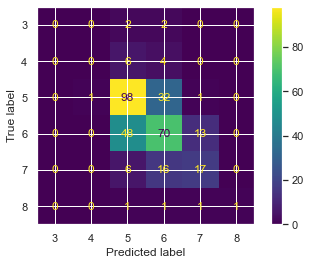

In [26]:
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [27]:
y_preds = clf.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        10
           5       0.61      0.74      0.67       132
           6       0.56      0.53      0.55       131
           7       0.53      0.44      0.48        39
           8       1.00      0.25      0.40         4

    accuracy                           0.58       320
   macro avg       0.45      0.33      0.35       320
weighted avg       0.56      0.58      0.56       320



#### RandomForest 

In [28]:
rfr = RandomForestClassifier()
parameters = {'n_estimators': [1,2, 3, 4, 5, 6, 7, 8, 9, 10],
              'max_features': ["auto", "sqrt"]}

In [29]:
clf = GridSearchCV(rfr, param_grid=parameters)

In [30]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [31]:
clf.score(X_train, y_train)

0.9812353401094606

In [32]:
clf.score(X_test, y_test)

0.6375

In [33]:
test_preds = clf.predict(X_test)

In [34]:
clf.best_params_

{'max_features': 'auto', 'n_estimators': 10}

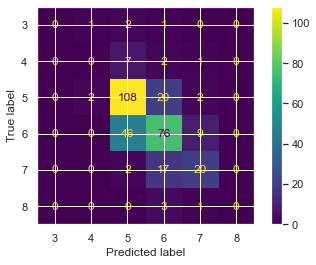

In [35]:
plot_confusion_matrix(clf, X_test, y_test)

In [36]:
y_preds = clf.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        10
           5       0.65      0.82      0.73       132
           6       0.64      0.58      0.61       131
           7       0.61      0.51      0.56        39
           8       0.00      0.00      0.00         4

    accuracy                           0.64       320
   macro avg       0.32      0.32      0.32       320
weighted avg       0.61      0.64      0.62       320



### Regression

In [37]:
rfr = RandomForestRegressor()
parameters = {'n_estimators': [1,2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
              'max_features': ["auto", "sqrt"],
              'max_depth': [5, 6, 7, 8]}

In [38]:
clf = GridSearchCV(rfr, param_grid=parameters)

In [39]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12]})

In [40]:
clf.best_params_

{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 12}

In [41]:
clf.score(X_train, y_train)

0.7360239063536893

In [42]:
clf.score(X_test, y_test)

0.4180813094639797

In [43]:
knn = KNeighborsRegressor()
parameters = {'n_neighbors': [6],
              'weights': ['distance'], 
              'algorithm': ['ball_tree', 'kd_tree'],
              'leaf_size': [1, 2, 3, 4, 5, 6]}

In [44]:
clf = GridSearchCV(knn, parameters)

In [45]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'leaf_size': [1, 2, 3, 4, 5, 6], 'n_neighbors': [6],
                         'weights': ['distance']})

In [46]:
clf.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'n_neighbors': 6,
 'weights': 'distance'}

In [47]:
clf.score(X_train, y_train)

1.0

In [48]:
clf.score(X_test, y_test)

0.33006777211660177